In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import squarify
import matplotlib.patches as Wedge
import colorcet as cc
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# má conduta ética

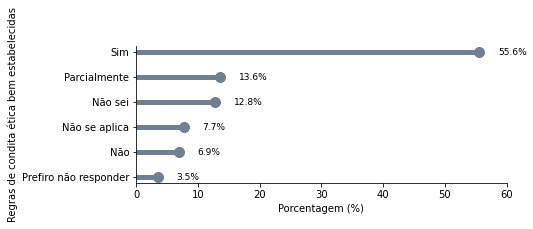

In [2]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.8_ethical_standards_workplace'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))


# Sort by 'count' or 'percentage' in descending order
df = df.sort_values(by='percentage', ascending=True)

# Create the vertical lollipop plot
plt.figure(figsize=(7.5, 3))
plt.hlines(y=df[column_interest], xmin=0, xmax=df['percentage'], color='slategray', linewidth=5)
plt.plot(df['percentage'], df[column_interest], "o", color="slategray", markersize=10)

# Customize the plot
plt.xlabel('Porcentagem (%)')
plt.ylabel('Regras de condita ética bem estabelecidas')
plt.yticks(rotation=0)  # Keep the y-axis labels horizontal

# Add annotations with percentage and count to the right of each dot
for i, row in df.iterrows():
    plt.text(
        row['percentage'] + 3, row[column_interest],  # Adjust horizontal position slightly to the right
        f"{row['percentage']}%",  # Format as "percentage% (count)"
        ha='left', va='center', fontsize=9
    )

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.xlim(0, 60)
plt.tight_layout()
# plt.savefig('/.../Figure_8a.pdf')
plt.show()


# Presenciou má conduta ética

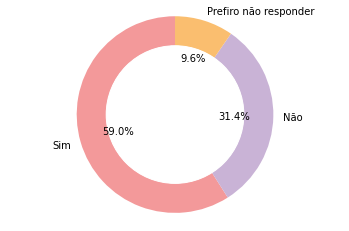

In [97]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.9_witnessed_ethical_misconduct'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Tol Light colors (hex codes)
tol_light_colors = [
    "#F3999A", "#C9B3D6", "#FABE6F"
]

# tol_light_colors = [
#     "#FABE6F", "#C9B3D6", "#F3999A"
# ]


cmap = plt.get_cmap('Dark2')
custom_colors = cmap(np.linspace(0, 1, len(df)))

# Define a custom autopct function to show percentages in parentheses
def autopct_format(pct):
    return f'({pct:.1f}%)'

# Create a donut chart
labels = df[column_interest]
sizes = df['count']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, wedgeprops=dict(width=0.3), startangle=90, autopct='%1.1f%%', colors=tol_light_colors[:len(df)])

# Draw a circle in the center to make it a donut
center_circle = plt.Circle((0, 0), 0.70, color='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures the pie is drawn as a circle.
ax.axis('equal')

# Display the chart
# plt.savefig('/.../Figure_8b.pdf')
plt.show()


# Má conduta homens vs. mulheres

In [49]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.9_witnessed_ethical_misconduct'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

df = df[[column_interest, '6.6_gender_identity']]

# Remove rows where column_interest has NaN values
df = df.dropna(subset=[column_interest])

fig = px.sunburst(
    data_frame = df,
    path = ['6.6_gender_identity', '5.9_witnessed_ethical_misconduct'],
    height = 700,
    template = 'none')
fig.show()


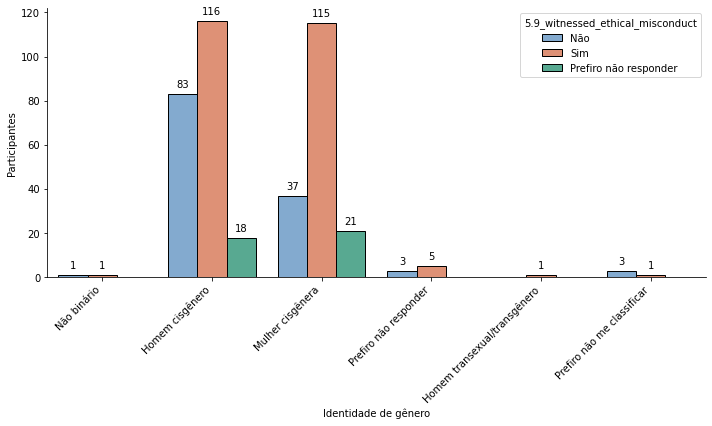

In [84]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.9_witnessed_ethical_misconduct'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

df = df[[column_interest, '6.6_gender_identity']]

# Remove rows where column_interest has NaN values
df = df.dropna(subset=[column_interest])

custom_palette = {'Não': '#76AADC', 'Sim': '#EF8865', 'Prefiro não responder':'#4BB697'}
# custom_palette = 'Paired'

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x='6.6_gender_identity',
    hue='5.9_witnessed_ethical_misconduct',
    edgecolor='black', palette=custom_palette
)

# Customize the plot
plt.xlabel('Identidade de gênero')
plt.ylabel('Participantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add counts above the bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(
            f'{int(height)}',
            (bar.get_x() + bar.get_width() / 2, height+2),
            ha='center',
            va='bottom',
            fontsize=10
        )

# Show the plot
# plt.savefig('/.../Figure_8c.pdf')
plt.show()


# habilidades necessárias e desenvolvidas

In [2]:
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.15_main_skills_develop'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

df_skills_to_develop = df.copy()


In [3]:
df = pd.read_csv('/Users/helenarusso/Documents/Pesquisa/JP-SBQ/Censo/Manuscrito/tabela/utf8-Respostas_JP_CENSO_corrected.txt', sep='\t')
column_interest = '5.16_skills_developed_during_studies'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

df_skills_developed = df.copy()


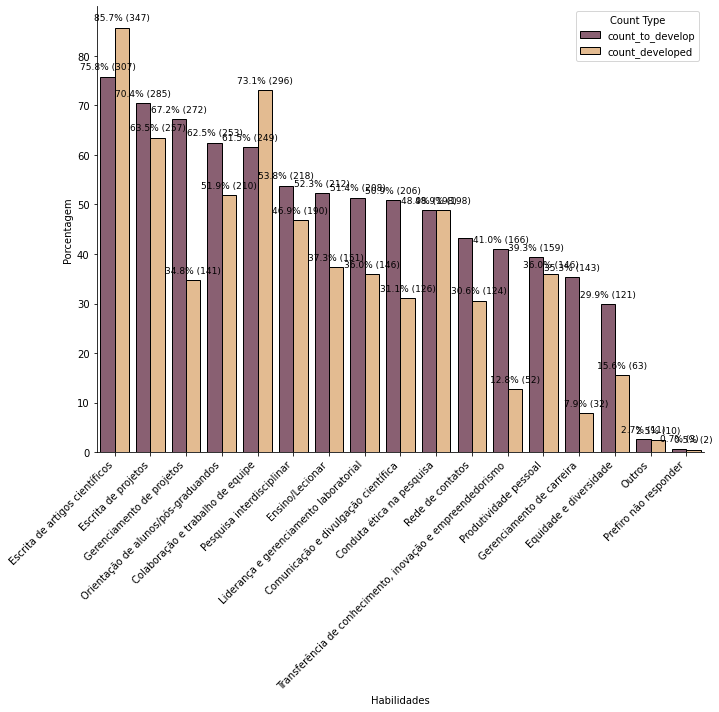

In [4]:
#rename columns
df_skills_to_develop.columns = ['skills', 'count_to_develop', 'percentage_to_develop']
df_skills_developed.columns = ['skills', 'count_developed', 'percentage_developed']

# # merge
df_merged = pd.merge(df_skills_to_develop, df_skills_developed, on='skills', how='left')

# Identify categorical columns in the DataFrame
categorical_columns = df_merged.select_dtypes(['category']).columns

# Add 0 as a category only to relevant categorical columns
for col in categorical_columns:
    df_merged[col] = df_merged[col].cat.add_categories([0])

# Now, you can fill NaN values with 0
df_merged = df_merged.fillna(0)

# Melt the DataFrame for Seaborn's format, using the specified columns
df_melted = df_merged.melt(id_vars=['skills'], 
                           value_vars=['count_to_develop', 'count_developed'], 
                           var_name='Count_Type', 
                           value_name='Count')

# Add a Percentage column with correct values based on Count_Type
df_melted['Percentage'] = df_melted.apply(
    lambda row: df_merged.loc[df_merged['skills'] == row['skills'], 
                              'percentage_to_develop' if row['Count_Type'] == 'count_to_develop' else 'percentage_developed'].values[0],
    axis=1
)

# Define the custom color palette
custom_palette = {'count_to_develop': '#905971', 'count_developed': '#F1BB83'}

# Create the grouped barplot
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=df_melted, x='skills', y='Percentage', hue='Count_Type', 
                 edgecolor='black', palette=custom_palette)

plt.xlabel('Habilidades')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Count Type')
plt.tight_layout()

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    if i != 10:
        height = p.get_height()
        if height >= 0:  # Display only for non-zero bars
            count = df_melted['Count'].iloc[i] if i < 10 else df_melted['Count'].iloc[i]
            ax.annotate(f'{height:.1f}% ({int(count)})',  # Format to 1 decimal place
                             (p.get_x() + p.get_width() / 2, height),
                             ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                         textcoords='offset points')
            

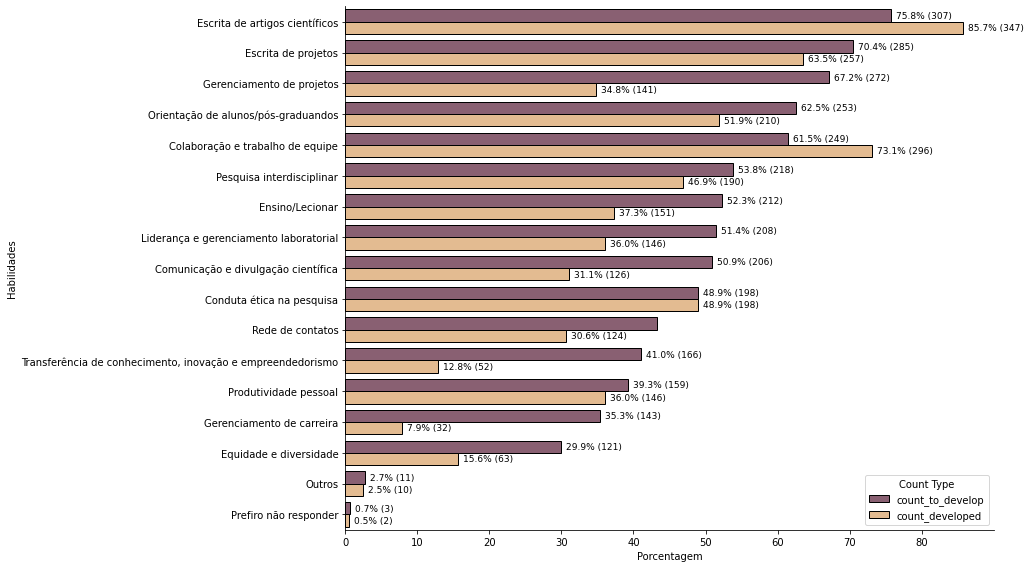

In [5]:
# Define the custom color palette
custom_palette = {'count_to_develop': '#905971', 'count_developed': '#F1BB83'}

# Create the grouped barplot (vertical orientation)
plt.figure(figsize=(14, 8))  # Adjust the figure size for vertical orientation
ax = sns.barplot(data=df_melted, y='skills', x='Percentage', hue='Count_Type', 
                 edgecolor='black', palette=custom_palette)

plt.ylabel('Habilidades')
plt.xlabel('Porcentagem')
plt.legend(title='Count Type')
plt.tight_layout()

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    if i != 10:
        width = p.get_width()
        if width >= 0:  # Display only for non-zero bars
            count = df_melted['Count'].iloc[i] if i < 10 else df_melted['Count'].iloc[i]
            ax.annotate(f'{width:.1f}% ({int(count)})',  # Format to 1 decimal place
                             (width, p.get_y() + p.get_height() / 2),
                             ha='left', va='center', fontsize=9, color='black', xytext=(5, 0),
                         textcoords='offset points')


# plt.savefig('/.../Figure_8d.pdf')

plt.show()


# satisfação

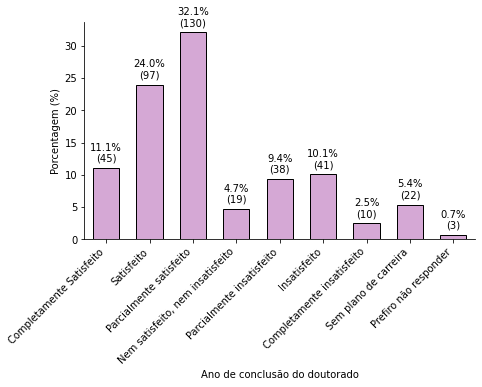

In [133]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.13_satisfaction_career_plan'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

# Define the desired order
category_order = [
    'Completamente Satisfeito',
    'Satisfeito',
    'Parcialmente satisfeito',
    'Nem satisfeito, nem insatisfeito',
    'Parcialmente insatisfeito',
    'Insatisfeito',
    'Completamente insatisfeito',
    'Sem plano de carreira',
    'Prefiro não responder',
]

# Convert the column to a categorical type with the specified order
df[column_interest] = pd.Categorical(df[column_interest], categories=category_order, ordered=True)

# Sort the DataFrame based on the new categorical order
df = df.sort_values(by=column_interest)


# Creating a bar plot
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=df, x=column_interest, y='percentage', 
                 width=0.6, color='plum', edgecolor='black')
plt.xlabel('Ano de conclusão do doutorado')
plt.ylabel('Porcentagem (%)')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding labels based on the actual positions of the bars
for bar, (index, row) in zip(ax.patches, df.iterrows()):
    # Get the height of the bar for correct positioning
    height = bar.get_height()
    percentage = row['percentage']
    count = row['count']
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2.7, f'{percentage}%', 
            ha='center', color='black')
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'({count})', 
            ha='center', color='black')

# plt.savefig('/.../Figure_8e.pdf')

plt.show()

